# 线性回归


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 单变量线性回归


In [17]:
path = "ex1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

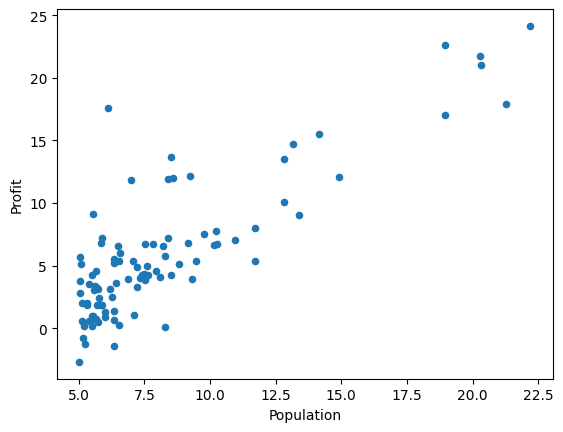

In [19]:
data.plot(kind="scatter", x="Population", y="Profit")

首先，我们将创建一个以参数 θ 为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}} $$


In [20]:
data.insert(0, "ones", 1)

### 初始化模型参数，输入矩阵，输出矩阵


In [21]:
theta = np.array([[0.0, 0.0]])
x = np.array(data[["ones", "Population"]].values)
y = np.array(data[["Profit"]].values)

In [22]:
def computeCost(x: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # np.matric.T 为矩阵的转置
    return np.sum(np.power(x.dot(theta.T) - y, 2)) / (2 * len(x))


computeCost(x, y, theta)

32.072733877455676

### 梯度下降


In [23]:
alpha = 0.01
iterations = 1000


def gradient_descent(
    x: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha: float, iterations: int
):
    delta = np.zeros((iterations, theta.shape[1]))
    cost = np.zeros(iterations)
    for k in np.arange(iterations):
        for j in np.arange(theta.shape[1]):
            temp = np.sum(np.multiply((x.dot(theta.T) - y), x[:, j].reshape(-1, 1)))
            theta[0, j] = theta[0, j] - temp * alpha / len(x)
            delta[k, j] = theta[0, j]
        cost[k] = computeCost(x, y, theta)
    return theta, cost, delta


theta, cost, delta = gradient_descent(x, y, theta, alpha, iterations)
theta

array([[-3.25088222,  1.12836314]])

In [24]:
# 模型训练后的预估
computeCost(x, y, theta)

4.514833339953507

### 绘制拟合曲线


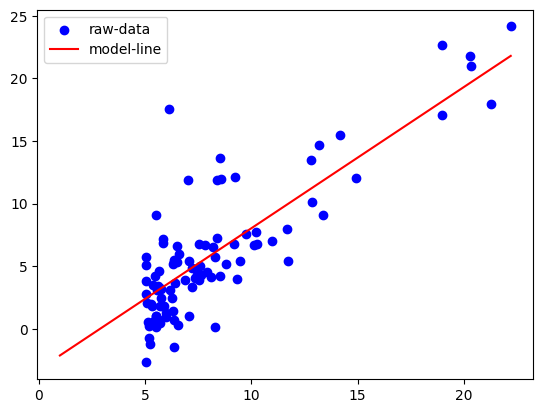

In [25]:
# 绘制原始数据的散点图
plt.scatter(data["Population"], data["Profit"], label="raw-data", color="blue")

# 绘制拟合曲线
# 绘制拟合曲线
x1 = np.arange(x.min(), x.max(), 0.01)
xx = np.vstack((np.ones_like(x1), x1)).T
y1 = xx @ theta.T
plt.plot(x1, y1, label="model-line", color="red")

# 添加图例
plt.legend()

# 显示图形
plt.show()

### 显示训练过程


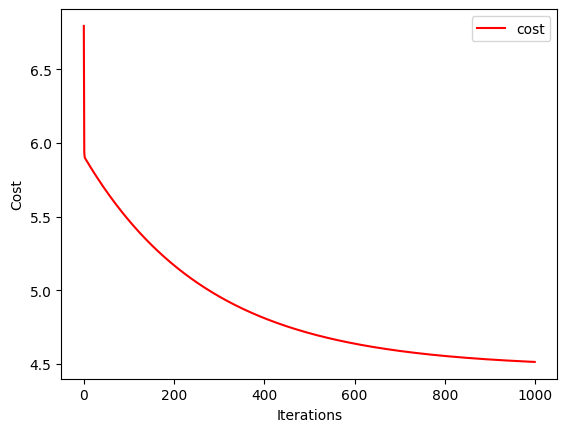

In [26]:
iters = np.arange(iterations)
plt.plot(iters, cost, label="cost", color="r")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.show()

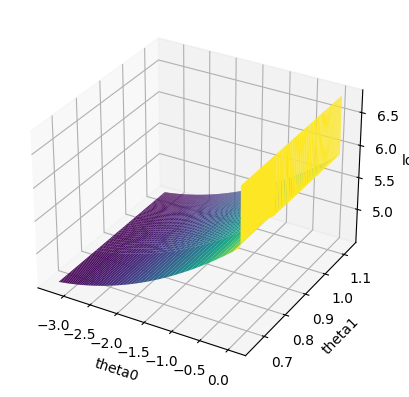

array([[-3.25088222,  1.12836314]])

In [27]:
# 创建一个3D图形的figure
fig = plt.figure()

# 创建3D坐标轴
ax = fig.add_subplot(111, projection="3d")
X, Y = np.meshgrid(delta[:, 0], delta[:, 1])

# 绘制曲面图
ax.plot_surface(X, Y, cost.reshape(1, -1), cmap="viridis")

# 设置坐标轴的标签
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("loss")

# 显示图形
plt.show()
theta

## 多变量线性回归


In [28]:
df = pd.read_csv("ex1data2.txt", header=None, names=["area", "bedrooms", "price"])
df.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [29]:
normalized_data = (df - df.mean()) / df.std()
normalized_data.head()

,area,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [35]:
x2 = normalized_data[["area", "bedrooms"]].to_numpy()
x2 = np.insert(x2, 0, 1, axis=1)
y2 = np.array(normalized_data["price"]).reshape(-1, 1)
theta2 = np.zeros((1, x2.shape[1]))

In [36]:
computeCost(x2, y2, theta2)

0.4893617021276595

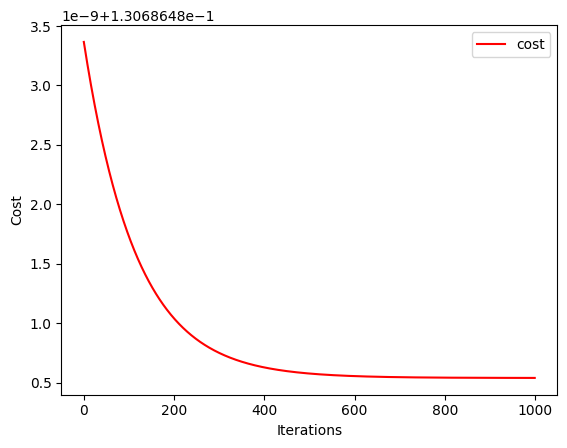

array([[-1.10354988e-16,  8.84764913e-01, -5.31777470e-02]])

In [39]:
theta2, cost2, delta2 = gradient_descent(x2, y2, theta2, alpha, iterations)

iters = np.arange(iterations)
plt.plot(iters, cost2, label="cost", color="r")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.show()
theta2

### 正规方程
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [65]:
def normal_eqn(x, y):
    return (np.linalg.pinv(x.T @ x) @ x.T @ y).T

In [66]:
normal_eqn(x,y), theta

(array([[-3.89578088,  1.19303364]]), array([[-3.25088222,  1.12836314]]))

### 对比正规方程和梯度下降法的效果

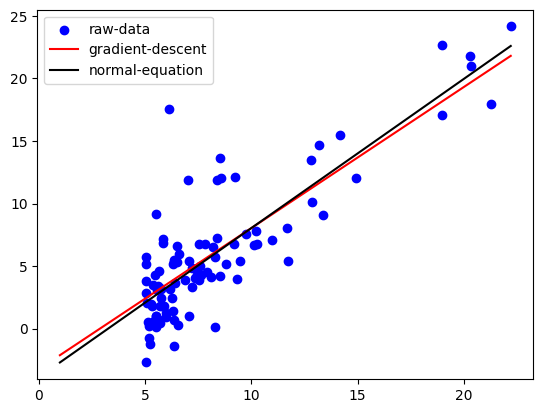

In [69]:
# 绘制原始数据的散点图
plt.scatter(data["Population"], data["Profit"], label="raw-data", color="blue")

# 绘制拟合曲线
# 绘制拟合曲线
x1 = np.arange(x.min(), x.max(), 0.01)
xx = np.vstack((np.ones_like(x1), x1)).T
y1 = xx @ theta.T
normal_eqn_y1 = xx @ normal_eqn(x, y).T
plt.plot(x1, y1, label="gradient-descent", color="red")
plt.plot(x1, normal_eqn_y1, label="normal-equation", color="black")

# 添加图例
plt.legend()

# 显示图形
plt.show()